<a href="https://colab.research.google.com/github/Maliffikrifirdaus96/Handson_git/blob/main/Project_DA_MAFF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

# Read Dataset

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,314.0,NaN,0,Transient,38.40,0,0,Check-Out,2019-01-14,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,62.80,0,0,Canceled,2017-10-21,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,12.0,NaN,0,Transient,110.00,0,0,Canceled,2018-11-25,3
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,200.0,0,Transient,45.00,0,0,Check-Out,2018-10-18,4
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,16.0,NaN,0,Transient,57.92,0,1,Canceled,2017-08-24,5


Business Understanding:

Variabel apa yang paling memicu tamu untuk batal?

Apakah kebijakan deposit saat ini sudah efektif?

Bagaimana cara menurunkan angka pembatalan tanpa mempengaruhi tamu potensial?


# Data Understanding

In [ ]:
df.shape

(83293, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83290 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

hotel: Type of hotel

is_canceled: Whether the booking was canceled or not

lead_time: Number of days between booking date and arrival date

arrival_date_year: The year of the arrival date

arrival_date_month: The month of the arrival date

arrival_date_week_number: The week number of the arrival date

arrival_date_day_of_month: The day of the month of the arrival date

stays_in_weekend_nights: Number of weekend nights stayed or booked to stay at the hotel

stays_in_week_nights: Number of week nights stayed or booked to stay at the hotel

adults: Number of adults

children: Number of children

babies: Number of babies

meal: Types food options included in booking package

country: columns provide demographic

market_segment: customer classification information

distribution_channel: columns provide demographic and customer classification information

is_repeated_guest: column specifies whether a guest is a repeated visitor or not.

previous_cancellations: column indicates how many previous bookings were canceled by a guest.

previous_bookings_not_canceled: shows how many previous bookings were not canceled by a guest.

reserved_room_type: column indicates which type room was originally reserved for each booking.

assigned_room_type: mentions which type room was finally assigned for each booking.

booking_changes: Number of changes made to the booking before arrival.

deposit_type: Type of deposit made for the booking.

agent & company: columns provide relevant information about the travel agency and/or company involved in making the reservation.

days_in_waiting_list: Number of days the booking was on a waiting list before it was confirmed or canceled.

customer_type: provides information on types of customers

adr: Average daily rate per room, calculated by dividing the sum of all lodging transactions by the total number of staying nights

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,bookingID
count,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83290.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,71889.000000,4734.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000
mean,0.369503,103.914230,2018.156808,27.164023,15.786116,0.930390,2.503812,1.854466,0.103614,0.008032,0.030243,0.086994,0.141765,0.223068,86.867282,190.003802,2.352238,101.724373,0.061818,0.571945,41647.000000
std,0.482673,106.874124,0.706656,13.623752,8.775931,1.004196,1.924511,0.606139,0.398821,0.100641,0.171255,0.862988,1.554390,0.656237,110.875605,131.969152,17.820652,48.082552,0.245027,0.793742,24044.762323
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.530000,0.000000,0.000000,20824.000000
50%,0.000000,69.000000,2018.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,183.000000,0.000000,94.500000,0.000000,0.000000,41647.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,62470.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,70.000000,21.000000,535.000000,543.000000,391.000000,508.000000,8.000000,5.000000,83293.000000


# Data Preparation

## Data Cleaning

### Cek Data Distribution

children mean 0.10361387921719294
children median 0.0


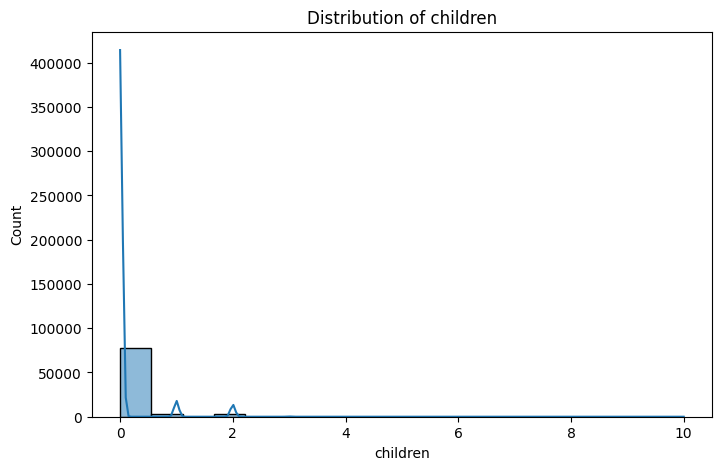

agent mean 86.8672815034289
agent median 14.0


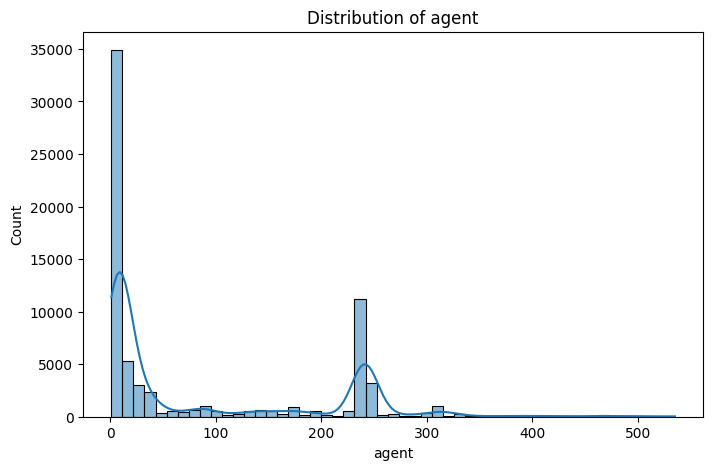

company mean 190.00380228136882
company median 183.0


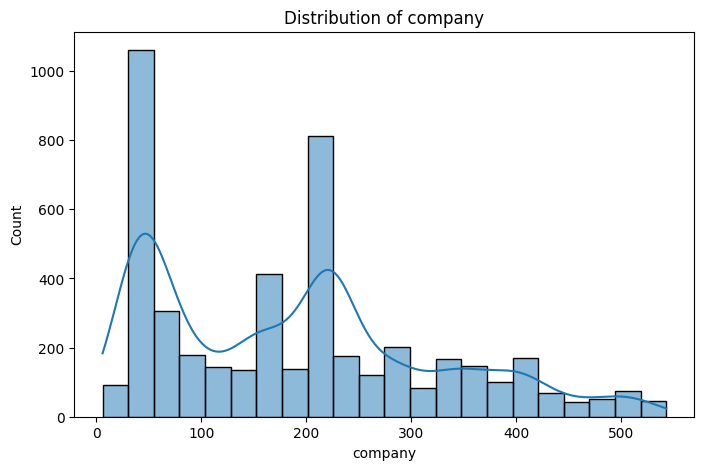

country counts:
 country
PRT    33952
GBR     8381
FRA     7243
ESP     5897
DEU     5107
Name: count, dtype: int64


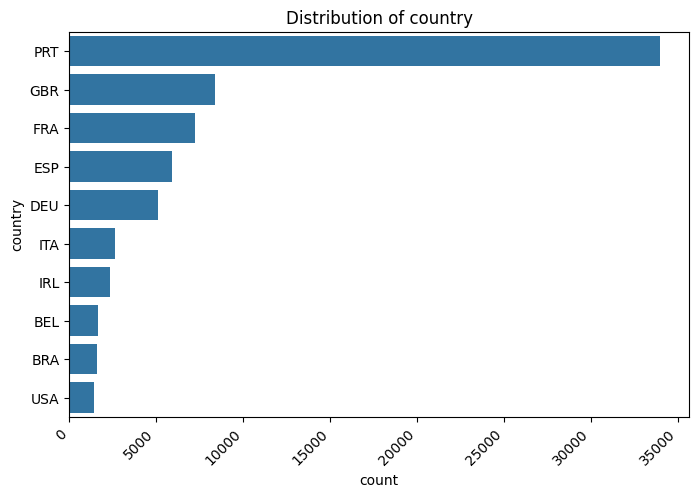

In [ ]:
# Cek distribusi data kolom
for column in ['children', 'agent', 'company', 'country']:
    # Only calculate mean/median for numerical columns
    if df[column].dtype in ['int64', 'float64']:
        print(f'{column} mean', df[column].mean())
        print(f'{column} median', df[column].median())
    else:
        # For non-numeric columns, print value counts or describe for categorical insights
        print(f'{column} counts:\n', df[column].value_counts().head())

    plt.figure(figsize=(8, 5))
    # Use histplot for numerical and countplot for categorical for better representation
    if df[column].dtype in ['int64', 'float64']:
        sns.histplot(df[column], kde=True)
    else:
        sns.countplot(df[column], order=df[column].value_counts().index[:10]) # Top 10 categories
        plt.xticks(rotation=45, ha='right')
    plt.title(f'Distribution of {column}')
    plt.show()

In [ ]:
# Menghapus duplikat data

df.drop_duplicates(inplace=True)

In [ ]:
# Handling missing value
# Kolom yang kosong diisi median
df['children'] = df['children'].fillna(df['children'].median())
df['agent'] = df['agent'].fillna(df['agent'].median())
df['company'] = df['company'].fillna(df['company'].median())

# Mengisi negara yang kosong dengan 'Unknown'
df['country'] = df['country'].fillna('Unknown')

In [ ]:
# Filter data yang tidak logis (['adults', 'children', 'babies'] yang berjumlah 0)

df_filter = df[~((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]
df_filter

Buffered data was truncated after reaching the output size limit.

In [ ]:
# Mengubah tipe data ke integer untuk kolom children, agent dan company
df['children'] = df['children'].astype(int)
df['agent'] = df['agent'].astype(int)
df['company'] = df['company'].astype(int)

In [ ]:
# Mengubah kolom tanggal menjadi format datetime agar bisa diolah
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

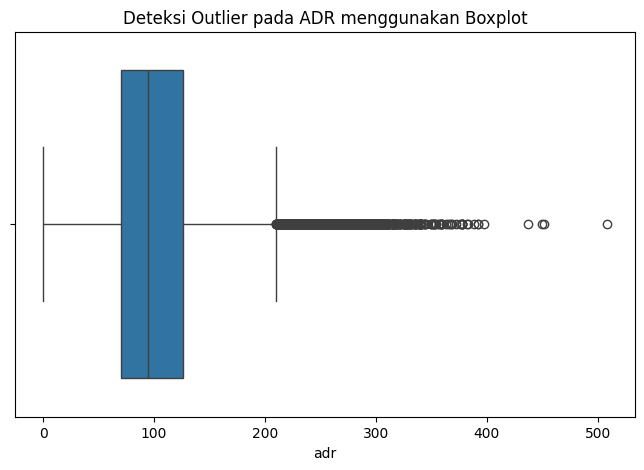

In [ ]:
# Cek Outlier
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['adr'])
plt.title('Deteksi Outlier pada ADR menggunakan Boxplot')
plt.show()

In [ ]:
# Cek jumlah outlier diatas 500
df[df['adr'] > 500].shape

(1, 33)

In [ ]:
# Filter Outlier ADR (Average Daily Rate)
# Kita membuang harga ekstrem > 500 dan harga 0/negatif
df_clean = df[(df['adr'] > 0) & (df['adr'] < 500)].copy()

In [ ]:
df_clean.shape

(81879, 33)

## Data Manipulaton

In [ ]:
# Feature Engineering: Mengelompokkan Lead Time agar lebih mudah dibaca

def group_lead_time(x):
    if x <= 7: return '0-7 Days'
    elif x <= 30: return '8-30 Days'
    elif x <= 90: return '31-90 Days'
    elif x <= 180: return '91-180 Days'
    else: return '> 180 Days'

df_clean['group_lead_time'] = df_clean['lead_time'].apply(group_lead_time)
order = ['0-7 Days', '8-30 Days', '31-90 Days', '91-180 Days', '> 180 Days']

In [ ]:
# Total Stay: Menghitung total malam menginap (weekend + week nights)
df_clean['total_stay'] = df_clean['stays_in_weekend_nights'] + df_clean['stays_in_week_nights']

In [ ]:
# Total Guests: Menghitung total orang dalam satu pesanan
df_clean['total_guests'] = df_clean['adults'] + df_clean['children'] + df_clean['babies']

In [ ]:
# Menandai Riwayat Pembatalan
df_clean['has_canceled_before'] = df_clean['previous_cancellations'].apply(lambda x: 'Pernah' if x > 0 else 'Belum Pernah')

In [ ]:
# Haling Outlier
# Menghitung Q1 (persentil 25) dan Q3 (persentil 75)
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mencari data outlier
outliers = df[(df['adr'] < lower_bound) | (df['adr'] > upper_bound)]

print(f"Batas Bawah: {lower_bound}")
print(f"Batas Atas: {upper_bound}")
print(f"Jumlah outlier yang terdeteksi: {len(outliers)}")

Batas Bawah: -14.0
Batas Atas: 210.0
Jumlah outlier yang terdeteksi: 2684


In [ ]:
df_clean.shape

(81879, 37)

# EDA

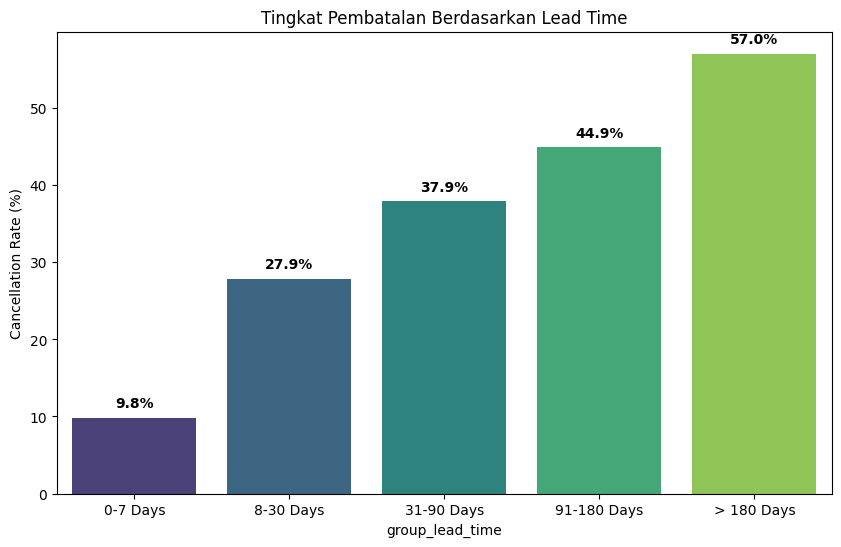

In [ ]:
# Lead Time vs Cancellation Rate
cancel_rate = df_clean.groupby('group_lead_time')['is_canceled'].mean().reset_index()
cancel_rate ['is_canceled'] *= 100

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=cancel_rate, x='group_lead_time', y='is_canceled', order=order, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontweight='bold', xytext=(0, 5), textcoords='offset points')
plt.title('Tingkat Pembatalan Berdasarkan Lead Time')
plt.ylabel('Cancellation Rate (%)')
plt.show()

Semakin lama **Lead Time** maka semakin besar kemungkinan pembatalannya

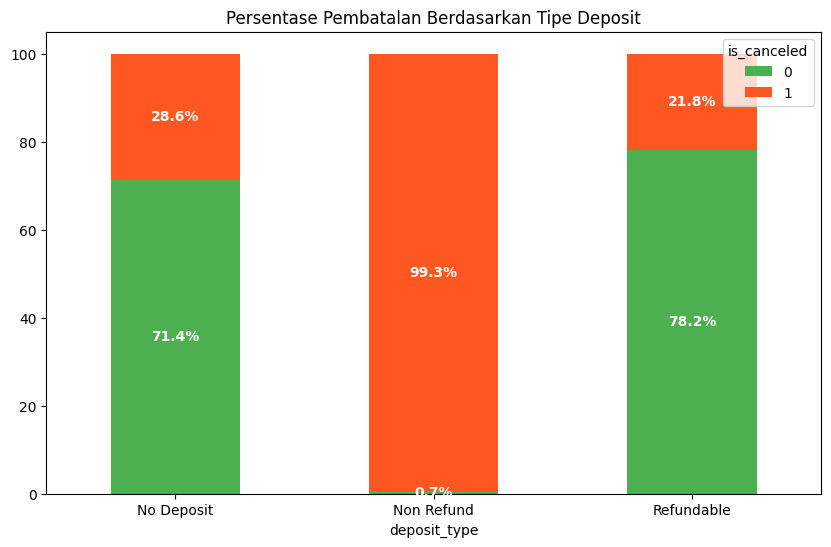

In [ ]:
# Deposit Type vs Cancellation (Stacked Bar)
deposit_cancel = pd.crosstab(df_clean['deposit_type'], df_clean['is_canceled'], normalize='index') * 100
ax = deposit_cancel.plot(kind='bar', stacked=True, color=['#4CAF50', '#FF5722'], figsize=(10, 6))
for container in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', color='white', fontweight='bold')
plt.title('Persentase Pembatalan Berdasarkan Tipe Deposit')
plt.xticks(rotation=0)
plt.show()

Berdasarkan **deposite_type** tipe refundable dan no deposit lebih rendah tingkat pembatalannya dibandingkan non refund

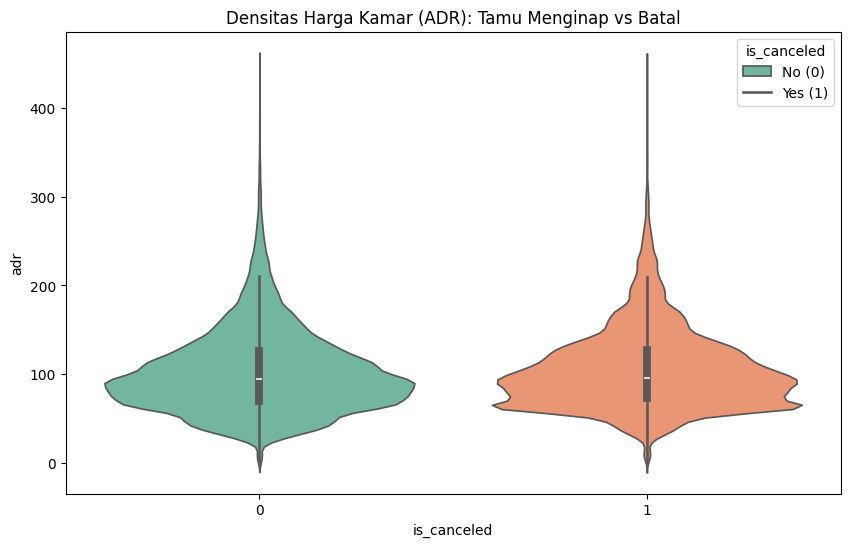

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='is_canceled', y='adr', data=df_clean, palette='Set2')
plt.title('Densitas Harga Kamar (ADR): Tamu Menginap vs Batal')
plt.legend(title='is_canceled', labels=['No (0)', 'Yes (1)'] )
plt.show()

Tingkat pembatalan terhadap **adr** atau harga tinggi lebih besar dari pada yang harganya atau **adr**nya rendah

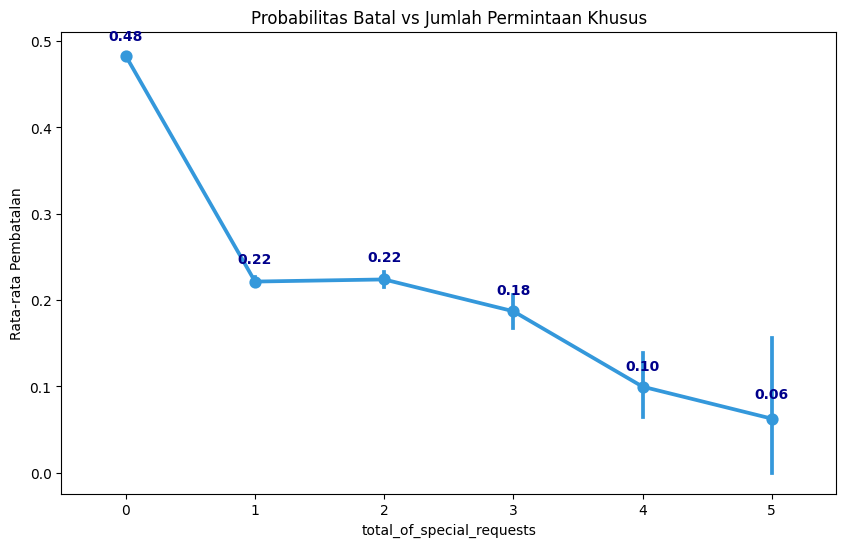

In [ ]:
# Special Requests (Engagement Indicator)
plt.figure(figsize=(10, 6))
ax = sns.pointplot(x='total_of_special_requests', y='is_canceled', data=df_clean, color='#3498db')
for x, y in zip(range(df['total_of_special_requests'].nunique()),
                 df.groupby('total_of_special_requests')['is_canceled'].mean()):
    ax.text(x, y + 0.02, f'{y:.2f}', ha='center', va='bottom', fontweight='bold', color='darkblue')
plt.title('Probabilitas Batal vs Jumlah Permintaan Khusus')
plt.ylabel('Rata-rata Pembatalan')
plt.show()

Lebih banyak **special_requests** dari customer berpengaruh menurunkan tingkat pembatalan dengan signifikan

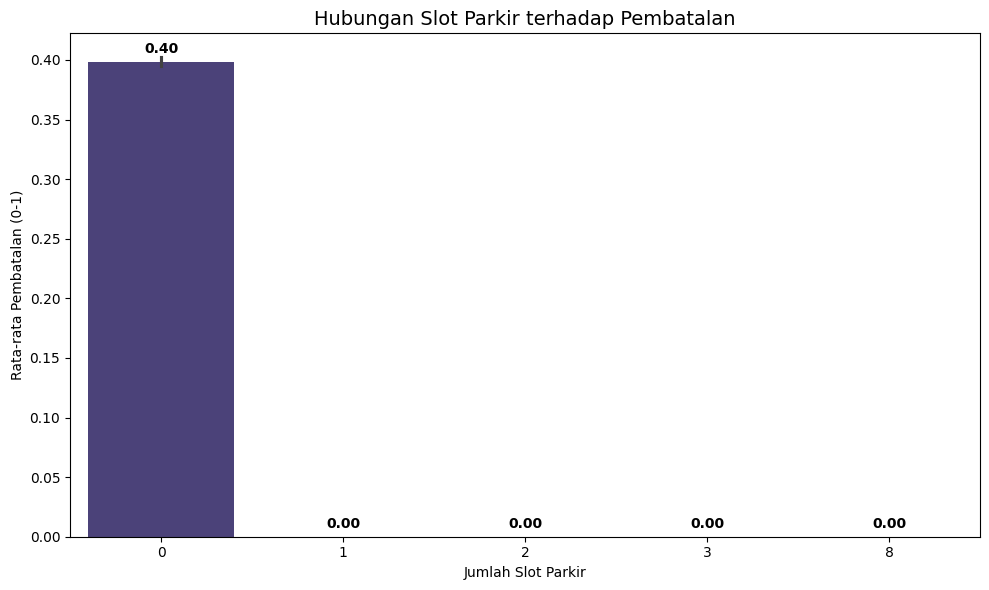

In [ ]:
# Hubungan dengan Parking Spaces (Barplot)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='required_car_parking_spaces', y='is_canceled', data=df_clean, palette='viridis')
ax.set_title('Hubungan Slot Parkir terhadap Pembatalan', fontsize=14)
ax.set_ylabel('Rata-rata Pembatalan (0-1)')
ax.set_xlabel('Jumlah Slot Parkir')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points',
                   fontweight='bold')

plt.tight_layout()
plt.show()

Ketersediaan **required_car_parking_spaces** sangat mempengaruhi tingkat pembatalan customer

Tingkat pembatalan tamu baru: 34.36%
Tingkat pembatalan tamu lama yang pernah batal: 92.09%


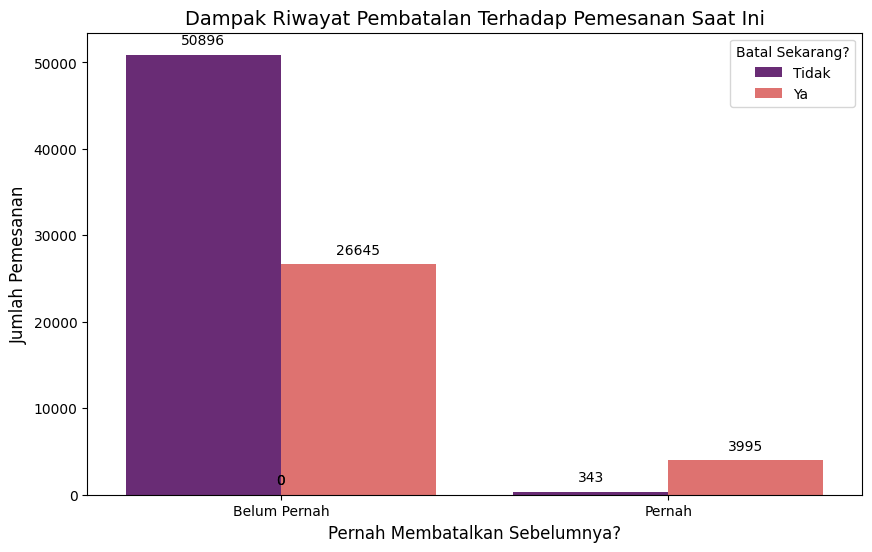

In [ ]:
# Membuat visualisasi perbandingan
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_clean, x='has_canceled_before', hue='is_canceled', palette='magma')
for bar in ax.patches:
    ax.annotate(f'{bar.get_height():.0f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

# Menghitung persentase pembatalan untuk anotasi (insight)
cancel_rates = df_clean.groupby('has_canceled_before')['is_canceled'].mean() * 100

plt.title('Dampak Riwayat Pembatalan Terhadap Pemesanan Saat Ini', fontsize=14)
plt.xlabel('Pernah Membatalkan Sebelumnya?', fontsize=12)
plt.ylabel('Jumlah Pemesanan', fontsize=12)
plt.legend(title='Batal Sekarang?', labels=['Tidak', 'Ya'])

print(f"Tingkat pembatalan tamu baru: {cancel_rates['Belum Pernah']:.2f}%")
print(f"Tingkat pembatalan tamu lama yang pernah batal: {cancel_rates['Pernah']:.2f}%")

plt.show()

Customer atau tamu yang **has_canceled_before** berpotensi lebih tinggi untuk melakukan kembali pembatalan

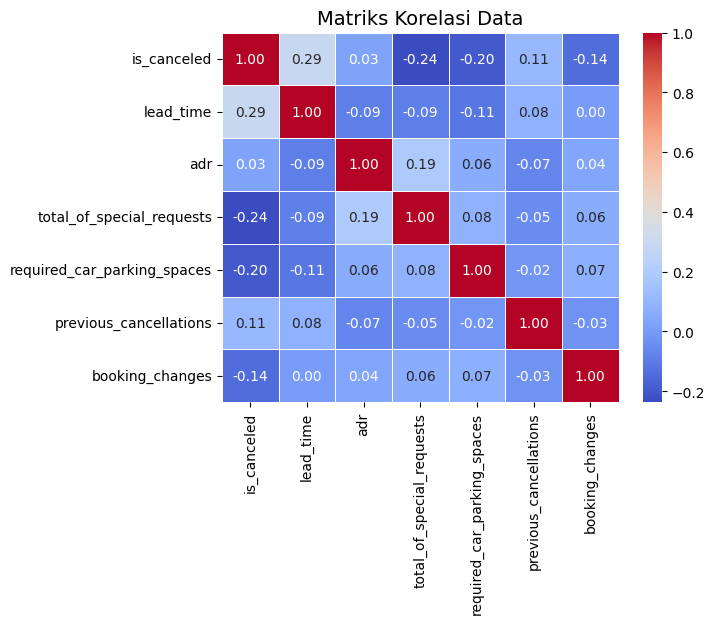

In [ ]:
# Corelation
Important_vars = [
    'is_canceled',
    'lead_time',
    'adr',
    'total_of_special_requests',
    'required_car_parking_spaces',
    'previous_cancellations',
    'booking_changes'
]
corr_data = df_clean[Important_vars].corr()
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Data', fontsize=14)
plt.show()

Korelasi **is_canceled** paling tinggi terjadi dengan **lead_time** sebesar 0.29 dan paling rendah terjadi dengan **total_of_special_requests** sebesar -0.24

##

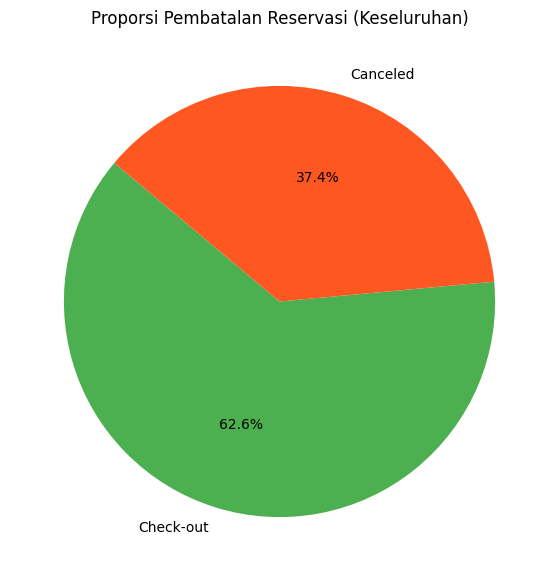

In [ ]:
# Visualisasi Pie Chart untuk komposisi pembatalan
cancel_counts = df_clean['is_canceled'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(cancel_counts, labels=['Check-out', 'Canceled'], autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#FF5722'])
plt.title('Proporsi Pembatalan Reservasi (Keseluruhan)')
plt.show()

Presentase pembatalan secara keseluruhan sebesar 37.4%

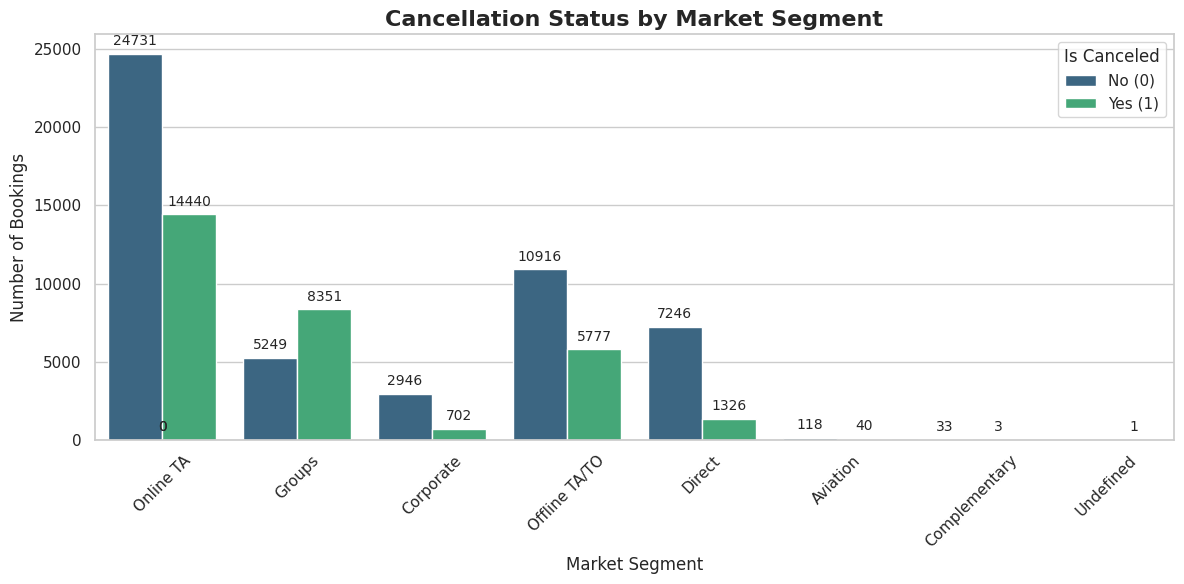

In [ ]:
# Cancellation vs Market segment
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

ax = sns.countplot(data=df_clean, x='market_segment', hue='is_canceled', palette='viridis')
plt.title('Cancellation Status by Market Segment', fontsize=16, fontweight='bold')
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.legend(title='Is Canceled', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize=10)

plt.tight_layout()
plt.show()

Jumlah pembatalan dan yang tidak batal tertinggi melalui **Online TA**

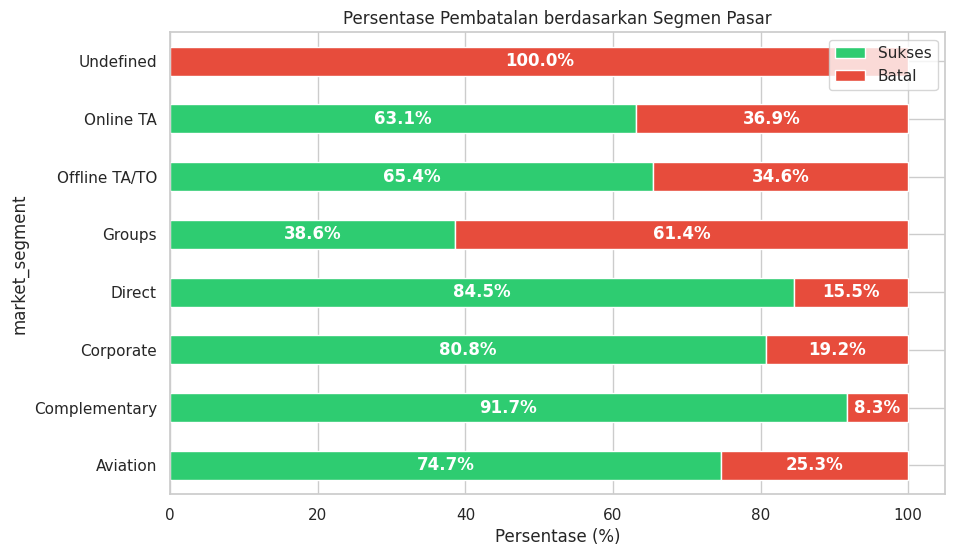

In [ ]:
# Stacked Bar: Market Segment vs Cancellation Status
segment_cancel = pd.crosstab(df_clean['market_segment'], df_clean['is_canceled'], normalize='index') * 100

ax = segment_cancel.plot(kind='barh', stacked=True, color=['#2ecc71', '#e74c3c'], figsize=(10, 6))
for container in ax.containers:
    labels = [f'{v.get_width():.1f}%' if v.get_width() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', color='white', fontweight='bold')
plt.title('Persentase Pembatalan berdasarkan Segmen Pasar')
plt.xlabel('Persentase (%)')
plt.legend(['Sukses', 'Batal'], loc='upper right')
plt.show()

Presentase **is_canceled** vs **market_segment** kebanyakan lebih tinggi tingkat suksesnya kecuali pada segment **Group** & **Undefined**

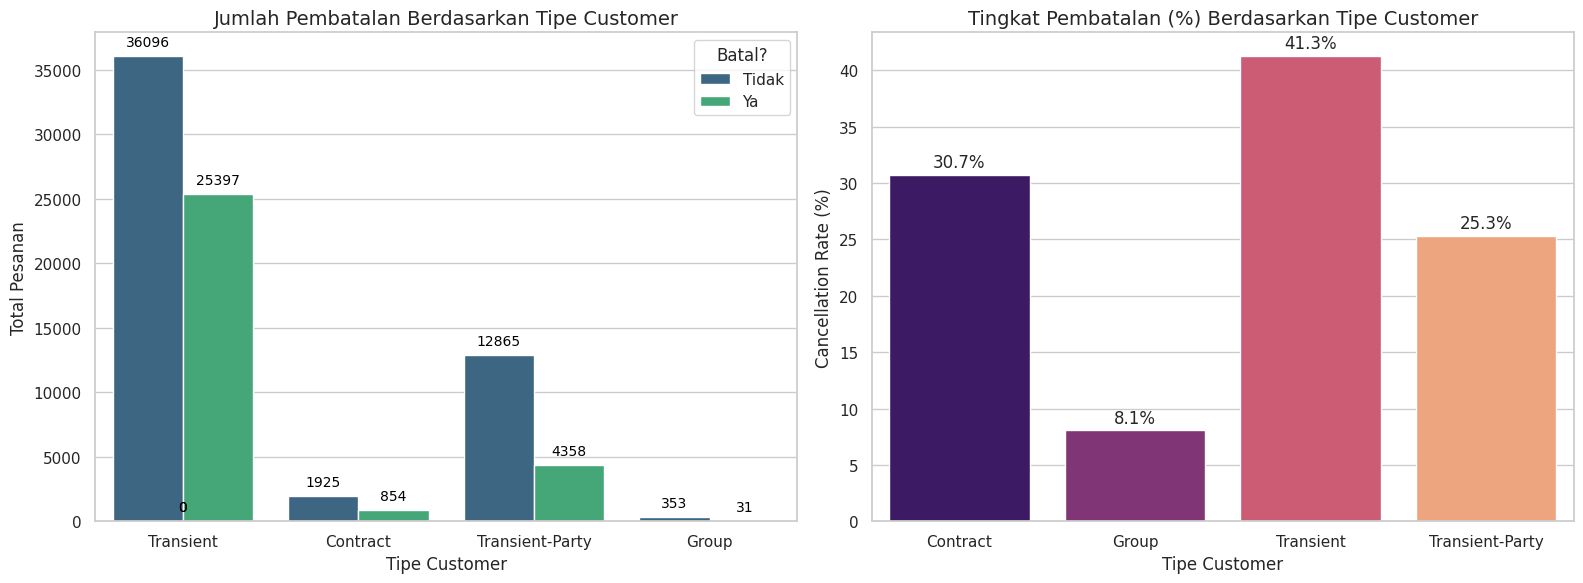

In [ ]:
# Setup Style
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# PLOT 1: Count Plot (Volume)
sns.countplot(data=df_clean, x='customer_type', hue='is_canceled', palette='viridis', ax=ax[0])
ax[0].set_title('Jumlah Pembatalan Berdasarkan Tipe Customer', fontsize=14)
ax[0].set_xlabel('Tipe Customer')
ax[0].set_ylabel('Total Pesanan')
ax[0].legend(title='Batal?', labels=['Tidak', 'Ya'])

for bar in ax[0].patches:
    ax[0].annotate(f'{bar.get_height():.0f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

# PLOT 2: Rate Plot (Persentase)
# Menghitung % pembatalan per tipe customer
cancel_rate = df_clean.groupby('customer_type')['is_canceled'].mean().reset_index()
cancel_rate['is_canceled'] = cancel_rate['is_canceled'] * 100 # Ubah ke persen

sns.barplot(data=cancel_rate, x='customer_type', y='is_canceled', palette='magma', ax=ax[1])
ax[1].set_title('Tingkat Pembatalan (%) Berdasarkan Tipe Customer', fontsize=14)
ax[1].set_xlabel('Tipe Customer')
ax[1].set_ylabel('Cancellation Rate (%)')

for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height():.1f}%',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.tight_layout()
plt.savefig('cancellation_vs_customer_type.png')
plt.show()

Jumlah pembatalan berdasarkan **customer_type** tertinggi pada tipe **Transient**

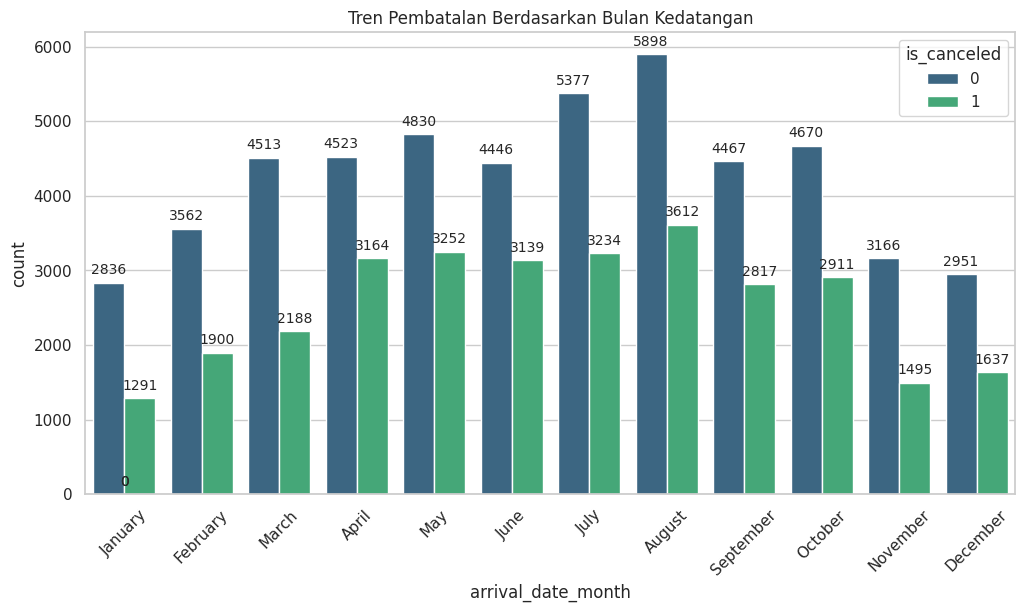

In [ ]:
# Mengurutkan bulan agar rapi di grafik
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_clean, x='arrival_date_month', hue='is_canceled', palette='viridis', order=month_order)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize=10)
plt.title('Tren Pembatalan Berdasarkan Bulan Kedatangan')
plt.xticks(rotation=45)
plt.show()

Bulan Agustus menjadi bulan tertinggi tingkat pembatalannya berdasarkan trend bulanan **arrival_date_month**

# A/B Testing

In [ ]:
from scipy.stats import chi2_contingency

# Skenario: Menguji kebijakan deposit pada tamu Lead Time tinggi (>60 hari)
# Grup A: Tanpa Deposit (Control)
# Grup B: Wajib Deposit (Variant)
data_ab = {
    'Canceled': [450, 280],
    'Not_Canceled': [550, 720]
}
df_ab = pd.DataFrame(data_ab, index=['Grup_A_Control', 'Grup_B_Variant'])

# Chi-Square Test
stat, p, dof, expected = chi2_contingency(df_ab)

print(f"Hasil Uji Chi-Square:")
print(f"P-Value: {p:.5f}")

if p < 0.05:
    print("KESIMPULAN: Perbedaan signifikan. Kebijakan deposit efektif menurunkan pembatalan.")
else:
    print("KESIMPULAN: Tidak ada perbedaan signifikan.")

Hasil Uji Chi-Square:
P-Value: 0.00000
KESIMPULAN: Perbedaan signifikan. Kebijakan deposit efektif menurunkan pembatalan.


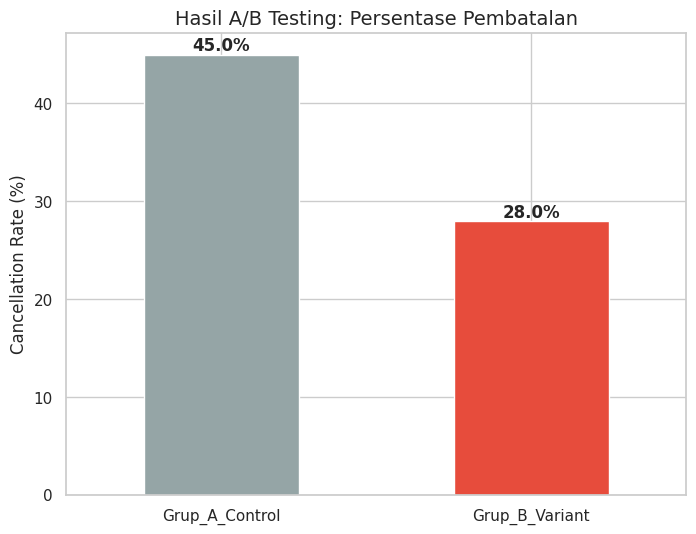

In [ ]:
# Visualisasi Persentase
df_percent = df_ab.div(df_ab.sum(axis=1), axis=0) * 100

plt.figure(figsize=(8, 6))
ax = df_percent['Canceled'].plot(kind='bar', color=['#95a5a6', '#e74c3c'])
plt.title('Hasil A/B Testing: Persentase Pembatalan', fontsize=14)
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=0)

# Tambahkan Label
for p_bar in ax.patches:
    ax.annotate(f'{p_bar.get_height():.1f}%',
                (p_bar.get_x() + p_bar.get_width() / 2., p_bar.get_height()),
                ha='center', va='bottom', fontweight='bold')

plt.show()

Berdasarkan **dummy** testing yang saya lakuakan presentase **is_canceled** menurun signifikan setelah diberlakukannya **deposit**

In [ ]:
# Simpan ke CSV
train_clean = df_clean.to_csv('train_clean.csv', index=False)

 Kesimpulan

 - **Lead Time** adalah Prediktor Utama: Dengan melihat semakin lama jarak antara pemesanan dan hari kedatangan maka, semakin besar probabilitas tamu untuk membatalkan pesanan. Dan tamu dengan lead time di atas 180 hari memiliki risiko pembatalan yang paling tinggi.

 - **Deposit**: Kebijakan**No Deposi** menyumbang volume pembatalan terbesar. Selain itu kebijakan **Non-Refundabl** justru memiliki tingkat pembatalan tinggi jika pemesannya group. Tetapi **deposit** memang penghalang (barrier) pembatalan yang efektif.

 - **Special Requests**: Terdapat korelasi negatif antara jumlah permintaan khusus dengan pembatalan. Tamu yang meminta fasilitas tambahan cenderung lebih berkomitmen untuk datang.

 - **ADR**: Melalui analisis ADR, ditemukan bahwa pembatalan sering kali dilakukan jika harga kamarnya lebih mahal. Ini menunjukkan tamu cenderung "mengamankan" kamar mahal dulu, lalu membatalkannya jika menemukan opsi yang lebih murah di kemudian hari.

 - Hasil **dummy** A/B Testing menunjukkan bahwa intervensi kebijakan deposit pada kelompok risiko tinggi memberikan hasil yang signifikan secara statistik ($P\text{-value} < 0.05$) dalam menurunkan angka pembatalan.

Rekomendasi Bisnis (Actionable Items)

1. Implementasi Kebijakan Deposit yang Dinamis
Jangan menerapkan wajib **deposit** pada tamu yang memesan dibawah 30 hari. Terapkan Wajib Deposit **Non-Refundable** hanya pada:
  - Tamu yang memesan dengan Lead Time > 90 hari.
  - Tamu yang memesan melalui **Group** atau**Online TA** yang memiliki tingkat pembatalan tinggi.
  - Tamu yang pernah melakukan pembatalan sebelumnya

2. Program Retensi "Engagement" Tamu
Hotel disarankan untuk:
  - Mengirimkan email otomatis 30 hari sebelum kedatangan untuk menanyakan preferensi tambahan (bantal ekstra, alergi makanan, dll) pada tamu.
  - Tamu yang merespons permintaan ini memiliki niat menginap yang lebih tinggi, sehingga staf bisa memprioritaskan alokasi kamar untuk mereka.

3. Strategi Harga (Dynamic Pricing)
Untuk menghindari pembatalan akibat **ADR** (sensitivitas harga):
Tawarkan diskon kecil atau benefit tambahan (seperti sarapan gratis) jika tamu bersedia mengubah status pesanan mereka dari**Refundable** menjadi **Non-Refundable** saat mendekati hari-H.